In [1]:
import torch
import torchvision.models as model
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms, datasets
import os
import glob
from tqdm import tqdm
from PIL import Image
import random
from sklearn.model_selection import train_test_split
import numpy as np
import timm.models as tmodels
import timm
%matplotlib inline

In [2]:
random_seed = 1120
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed)  # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [3]:
import matplotlib.image as img
import matplotlib.pyplot as plt

def imshow(x):
    x = img.imread(x)
    plt.imshow(x)
    plt.show()

In [6599]:
train_path = '/media/data2/rjsdn/zoom/dataset/compression/train6/'
val_path = '/media/data2/rjsdn/zoom/dataset/compression/val/'
test_path = '/media/data2/rjsdn/zoom/dataset/test7/'

w,h=224,224

transform = transforms.Compose([
    transforms.Resize((w,h)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.224,0.224,0.224))
])

# fakes = datasets.ImageFolder(train_path+'/fake',transform=transform)
# reals = datasets.ImageFolder(train_path+'/real',transform=transform)

fakes = datasets.ImageFolder(test_path+'/fake',transform=transform)
reals = datasets.ImageFolder(test_path+'/real',transform=transform)

val_img = datasets.ImageFolder(val_path,transform=transform)
test_img = datasets.ImageFolder(test_path,transform=transform)







In [5]:
len(fakes),len(reals)

(2000, 2000)

In [6618]:
model=timm.create_model('xception',num_classes=2)
model.load_state_dict(torch.load('weights/X_NS_100_15_L2_T//best.pth'))
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
device = torch.device("cuda")
model=model.to(device)

opt = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [7]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [6604]:
def gcam(model,plot,isreal=0):
    global cnt
    
    
    target_layers = [model.conv4]

    ax=plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
#     cnt=10000
#     for x in tqdm(fakes):
#         input_tensor=x[0].unsqueeze(0)
    
#         cam = GradCAM(model=model,target_layers=target_layers,use_cuda=True)
#         targets=[ClassifierOutputTarget(isreal)]
#         GS_cam = cam(input_tensor=input_tensor,targets=targets)

#         GS_cam = GS_cam[0,:]

#         real = np.transpose(x[0],(1,2,0))
#         img=np.array(real*0.224 + 0.5)
    
#     #     print(img)

#         V = show_cam_on_image(img,GS_cam,use_rgb=True)
#     #     plt.subplot(1,5,plot)
#         plt.imshow(V)
#         plt.savefig(f'/media/data2/rjsdn/zoom/grad/fake/{cnt}.png')
#         cnt+=1
#     #     plt.imshow(V)
#     for x in tqdm(reals):
    x=fakes[plot]
    input_tensor=x[0].unsqueeze(0)

    cam = GradCAM(model=model,target_layers=target_layers,use_cuda=True)
    targets=[ClassifierOutputTarget(isreal)]
    GS_cam = cam(input_tensor=input_tensor,targets=targets)

    GS_cam = GS_cam[0,:]

    real = np.transpose(x[0],(1,2,0))
    img=np.array(real*0.224 + 0.5)

#     print(img)

    V = show_cam_on_image(img,GS_cam,use_rgb=True)
#     plt.subplot(1,5,plot)
    plt.imshow(V)
#     plt.savefig(f'/media/data2/rjsdn/zoom/grad/fake/{cnt}.png')
    cnt+=1
#     plt.imshow(V)

In [6544]:
cnt=10000

In [ ]:
[100,900,500,1500]

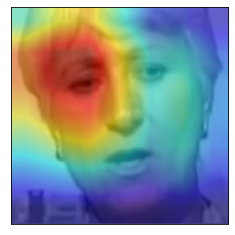

In [6617]:
gcam(model,100,isreal=0)

In [6474]:
cnt

11999

In [15]:
cnt=10000

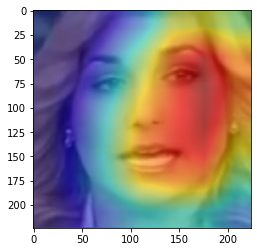

In [54]:
for idx,i in enumerate(range(2000)):
    gcam(fakes[i][0],model,idx+1,isreal=0)

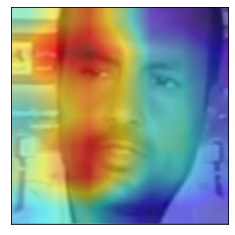

In [14]:
ax=plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
for idx,i in enumerate([4]):
    gcam(fakes[i][0],model,idx+1,isreal=0)

100%|██████████| 2000/2000 [5:41:31<00:00, 10.25s/it]  


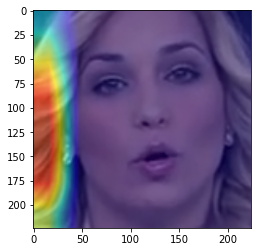

In [63]:
for i in tqdm(range(2000)):
    gcam(reals[i][0],model,i+1,isreal=1)